## Exploratory Machine Learning Analysis

We have a main dataset that we will use to train a model, and predict the Life Ladder values.

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies.
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Main dataset.
df = pd.read_csv('ds19_happ_temp_cw_gg_pop_pm_co2.csv')
df.head()

,Country,Year,Life Ladder,Temperature,Clean Water,Greenhouse Gas Emissions,Population,PM2.5,CO2 Emissions
0,Afghanistan,2010,4.758,14.629,48.28708,44910.0,29185511.0,52.49585,8397779.0
1,Afghanistan,2011,3.832,16.487,50.82785,58650.0,30117411.0,57.09972,12105788.0
2,Afghanistan,2012,3.783,14.373,53.40352,66750.0,31161378.0,55.46611,10218514.0
3,Afghanistan,2013,3.572,16.156,56.01404,74800.0,32269592.0,59.62277,8440766.0
4,Afghanistan,2014,3.131,15.647,58.65937,84620.0,33370804.0,62.72192,7774340.0


In [3]:
# Drop any and all NaN values.
df = df.dropna()
df.head()

,Country,Year,Life Ladder,Temperature,Clean Water,Greenhouse Gas Emissions,Population,PM2.5,CO2 Emissions
0,Afghanistan,2010,4.758,14.629,48.28708,44910.0,29185511.0,52.49585,8397779.0
1,Afghanistan,2011,3.832,16.487,50.82785,58650.0,30117411.0,57.09972,12105788.0
2,Afghanistan,2012,3.783,14.373,53.40352,66750.0,31161378.0,55.46611,10218514.0
3,Afghanistan,2013,3.572,16.156,56.01404,74800.0,32269592.0,59.62277,8440766.0
4,Afghanistan,2014,3.131,15.647,58.65937,84620.0,33370804.0,62.72192,7774340.0


This time we will **DROP** the **Country** and **Year** columns.

In [4]:
# Drop ID and year columns.
df.drop(columns=['Country', 'Year'], inplace=True)
df.head()

,Life Ladder,Temperature,Clean Water,Greenhouse Gas Emissions,Population,PM2.5,CO2 Emissions
0,4.758,14.629,48.28708,44910.0,29185511.0,52.49585,8397779.0
1,3.832,16.487,50.82785,58650.0,30117411.0,57.09972,12105788.0
2,3.783,14.373,53.40352,66750.0,31161378.0,55.46611,10218514.0
3,3.572,16.156,56.01404,74800.0,32269592.0,59.62277,8440766.0
4,3.131,15.647,58.65937,84620.0,33370804.0,62.72192,7774340.0


In [5]:
# Split values.
X = df.drop(columns='Life Ladder')
y = df['Life Ladder']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
# Create regression model.
model = LinearRegression(n_jobs=-1)

In [7]:
# Fit the model.
model.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [8]:
# Make predictions.
pred = model.predict(X_test)

In [9]:
# Compare the results.
results = pd.DataFrame(zip(pred, y_test), columns=['Predicted', 'Actual'])
results['Difference'] = abs(results['Predicted'] - results['Actual'])
results

,Predicted,Actual,Difference
0,4.815170,5.031,0.215830
1,5.598975,6.568,0.969025
2,5.660210,4.713,0.947210
3,5.700476,5.147,0.553476
4,6.271333,7.118,0.846667
...,...,...,...
216,5.513939,4.680,0.833939
217,5.696581,4.976,0.720581
218,5.772104,4.288,1.484104
219,5.840763,6.580,0.739237


In [10]:
# Style.
from matplotlib import style
style.use('fivethirtyeight')

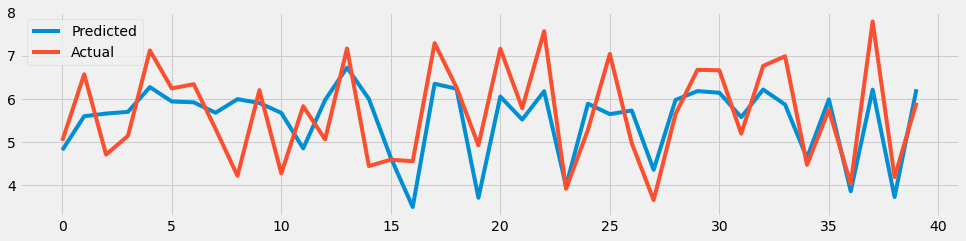

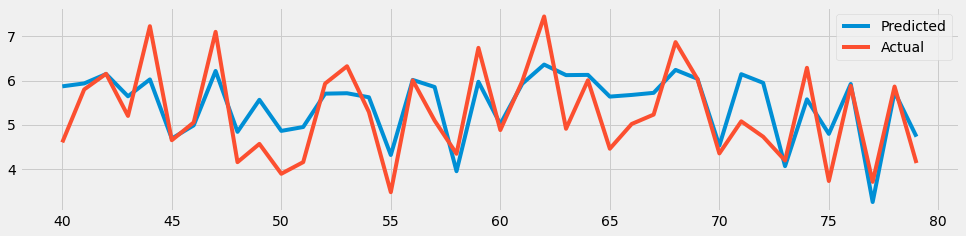

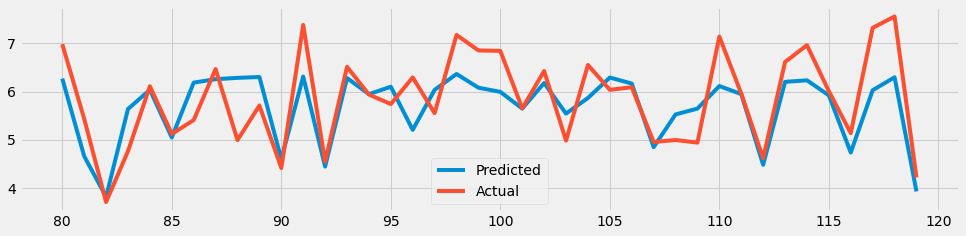

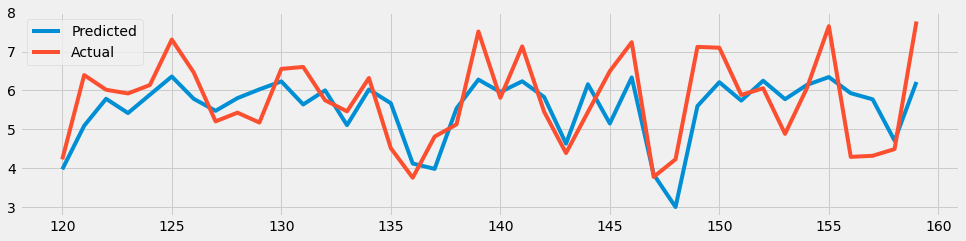

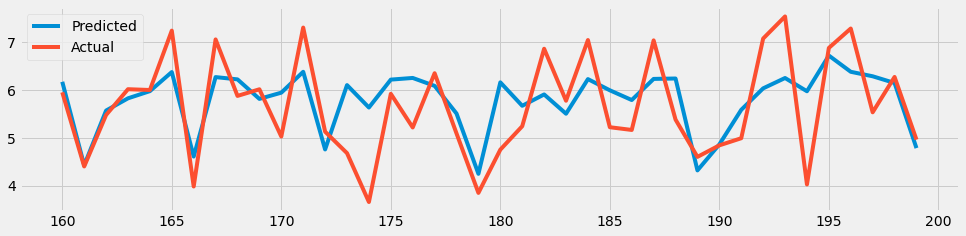

In [11]:
# Try and plot the differences.
bins = [0, 40, 80, 120, 160]
for i in bins:
    results.iloc[i:i+40].plot(y=['Predicted', 'Actual'], figsize=(15,3.5))

In [12]:
# Save results DF to compare to 20_ml.
results.to_csv('ml_results/21_ml_results.csv', index=False)